# 다중분류, Iris

In [22]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('/content/iris.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [25]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]
X.shape, y.shape

((150, 4), (150,))

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [27]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [28]:
# One Hot Encoding
from tensorflow import keras
y = keras.utils.to_categorical(y)

In [29]:
# 학습/테스트 분리

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2022, shuffle = True)

In [30]:
# scailing
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)

In [31]:
## 모델
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, input_shape = (4,), activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(3, activation = 'softmax')                      
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                80        
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 3)                 51        
                                                                 
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


In [32]:
# 모델 컴파일 (손실함수, 옵티마이저)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [33]:
EPOCHS = 200
BATCH_SIZE = 16
history = model.fit(X_train, y_train, epochs = EPOCHS, validation_split= 0.2, batch_size = BATCH_SIZE)

Epoch 1/200
6/6 [==============================] - 1s 38ms/step - loss: 1.0531 - acc: 0.3333 - val_loss: 1.0493 - val_acc: 0.3750
Epoch 2/200
6/6 [==============================] - 0s 7ms/step - loss: 0.9908 - acc: 0.5000 - val_loss: 0.9833 - val_acc: 0.5417
Epoch 3/200
6/6 [==============================] - 0s 8ms/step - loss: 0.9397 - acc: 0.7500 - val_loss: 0.9236 - val_acc: 0.6250
Epoch 4/200
6/6 [==============================] - 0s 9ms/step - loss: 0.8942 - acc: 0.8021 - val_loss: 0.8676 - val_acc: 0.7917
Epoch 5/200
6/6 [==============================] - 0s 7ms/step - loss: 0.8515 - acc: 0.8229 - val_loss: 0.8169 - val_acc: 0.8333
Epoch 6/200
6/6 [==============================] - 0s 7ms/step - loss: 0.8100 - acc: 0.8542 - val_loss: 0.7688 - val_acc: 0.8750
Epoch 7/200
6/6 [==============================] - 0s 10ms/step - loss: 0.7730 - acc: 0.8542 - val_loss: 0.7241 - val_acc: 0.8750
Epoch 8/200
6/6 [==============================] - 0s 8ms/step - loss: 0.7346 - acc: 0.8438 - v

In [34]:
# 결과 시각화

def plot_history(history):
  hist = history.history
  plt.figure(figsize = (20, 12))
  plt.subplot(1, 2, 1)
  plt.plot(history.epoch, hist['loss'], label = 'loss')
  plt.plot(history.epoch, hist['val_loss'], label = 'val_loss')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(history.epoch, hist['acc'], label = 'acc')
  plt.plot(history.epoch, hist['val_acc'], label = 'val_acc')
  plt.legend()
  plt.show()

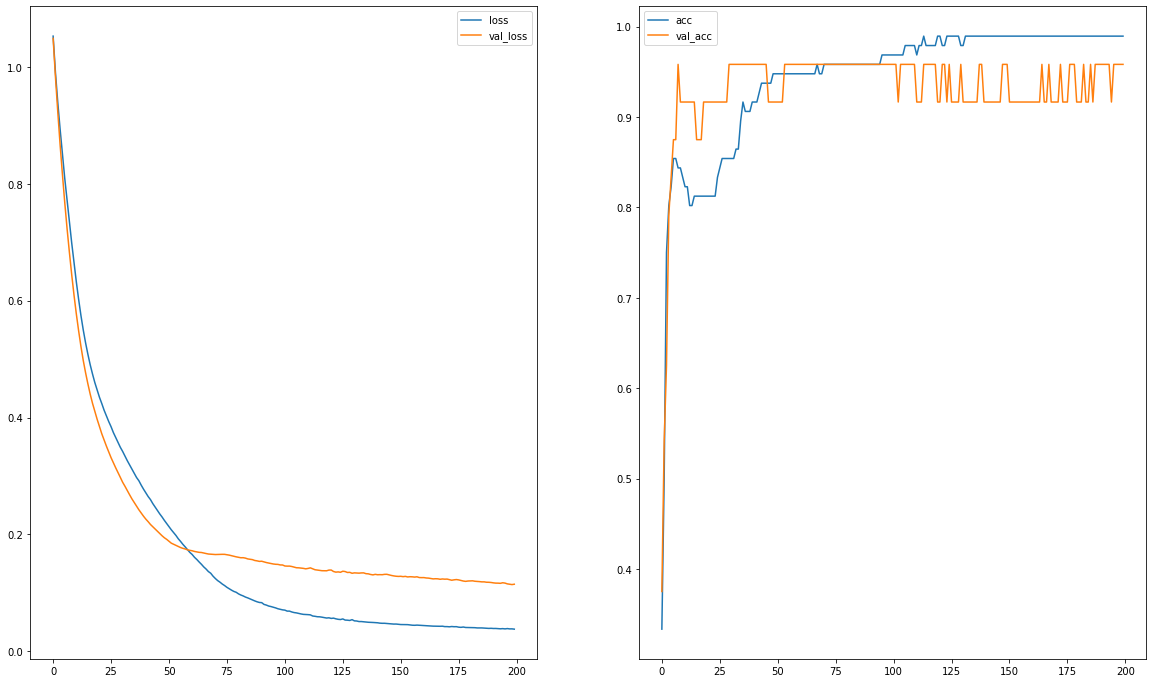

In [35]:
plot_history(history)

In [36]:
X_test = ss.transform(X_test)
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 20ms/step - loss: 0.1783 - acc: 0.8667


[0.17830924689769745, 0.8666666746139526]

In [37]:
y_pred = model.predict(X_test)
y_pred

array([[9.17990974e-07, 1.71630454e-04, 9.99827385e-01],
       [1.14051936e-07, 6.17254991e-04, 9.99382615e-01],
       [9.99344528e-01, 5.79527987e-04, 7.59021641e-05],
       [1.68328406e-04, 8.86780173e-02, 9.11153615e-01],
       [9.99833345e-01, 1.28873275e-04, 3.78093719e-05],
       [9.98817205e-01, 1.07915886e-03, 1.03667582e-04],
       [3.09816824e-04, 9.99412179e-01, 2.78036809e-04],
       [2.42793787e-04, 9.98720407e-01, 1.03680720e-03],
       [9.99893427e-01, 8.24980016e-05, 2.40527952e-05],
       [1.68055019e-04, 9.99648333e-01, 1.83631797e-04],
       [4.83046315e-04, 9.96385813e-01, 3.13108205e-03],
       [1.31692650e-04, 5.07555366e-01, 4.92312938e-01],
       [8.50755459e-05, 9.99057472e-01, 8.57491454e-04],
       [1.26073780e-06, 9.48366214e-05, 9.99903917e-01],
       [6.16838469e-10, 4.54140354e-06, 9.99995470e-01],
       [9.99897122e-01, 8.04186493e-05, 2.24606283e-05],
       [1.48093048e-03, 9.97746646e-01, 7.72358442e-04],
       [3.92642796e-05, 7.77304

In [39]:
y_pred = np.argmax(y_pred, axis = 1)

In [40]:
y_test = np.argmax(y_test, axis = 1)
# y_test가 one-hot encoding 되어있으므로 이 역시 argmax를 해준다.

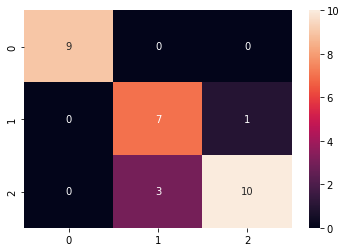

In [41]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot = True)